<a href="https://colab.research.google.com/github/RanjanRaj07/OpenCV_basics/blob/main/Image_Aligning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
refFilename = 'form.jpg'
print("reading reference image :",refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

imFilename = 'scanned-form.jpg'
print('reading image to align :',imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

reading reference image : form.jpg
reading image to align : scanned-form.jpg


Text(0.5, 1.0, 'Scanned Form')

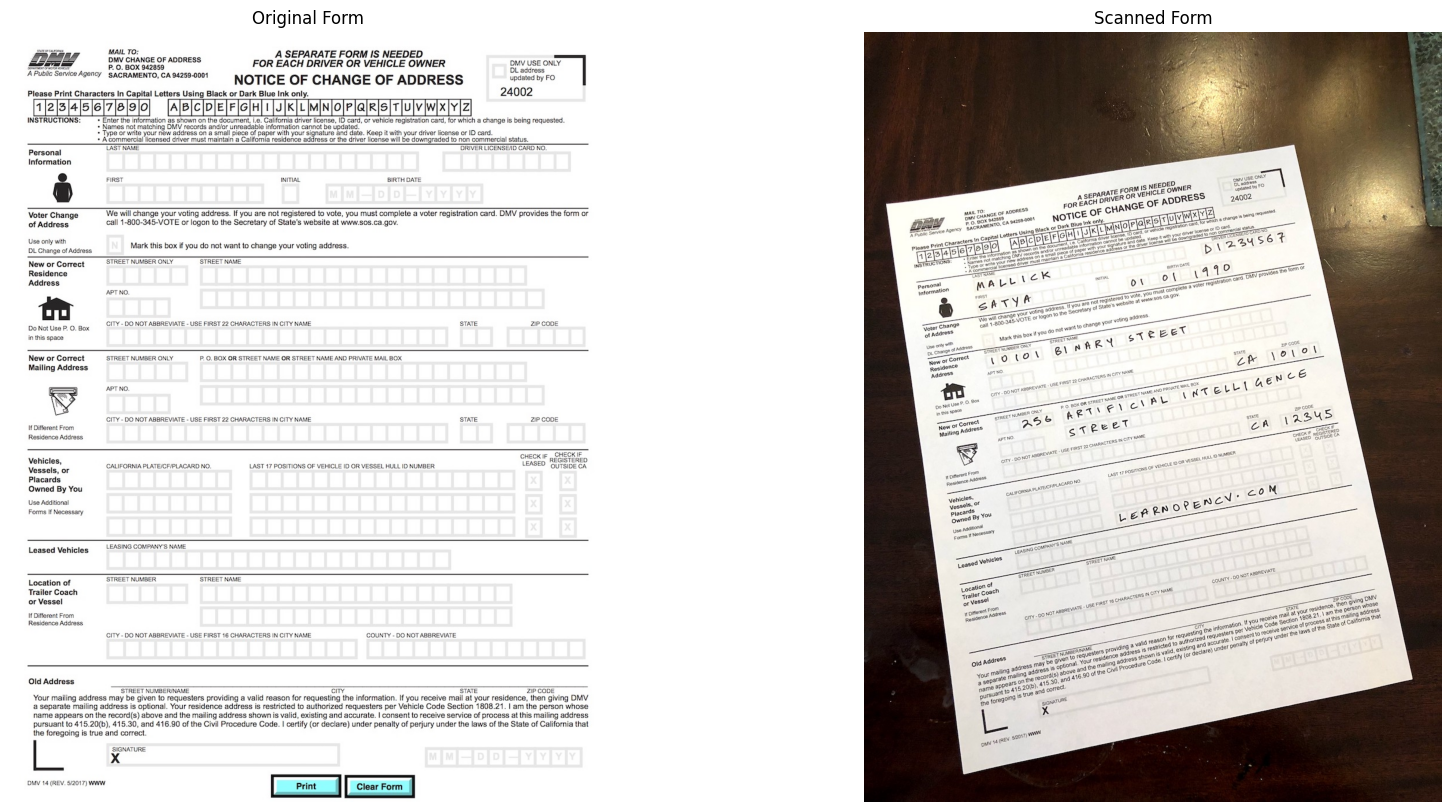

In [ ]:
#displaying the images read
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1);plt.title('Original Form')
plt.subplot(122); plt.axis('off'); plt.imshow(im2);plt.title('Scanned Form')

In [ ]:
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptions1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptions2 = orb.detectAndCompute(im2_gray, None)

im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'Scanned Form')

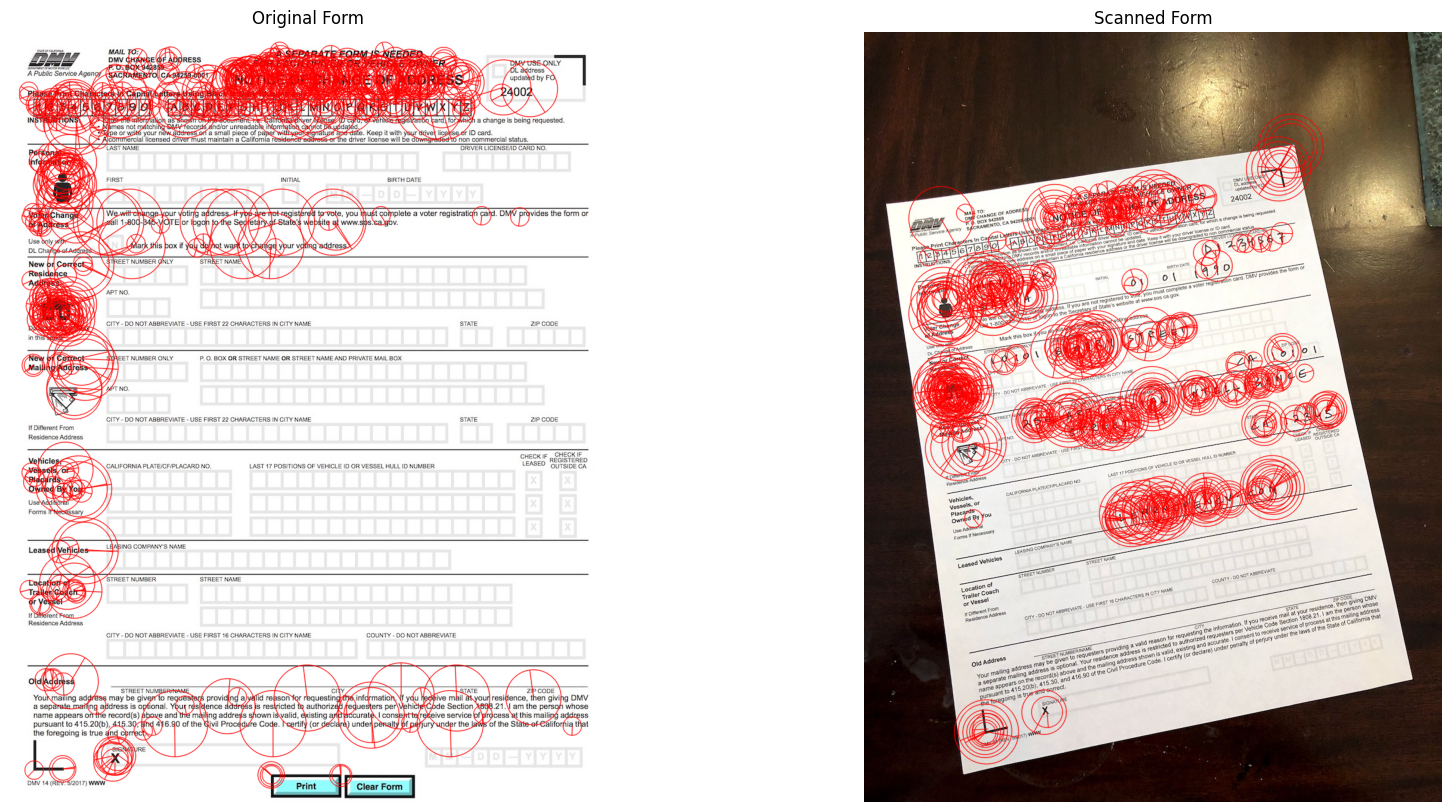

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display);plt.title('Original Form')
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display);plt.title('Scanned Form')

searching for matching keypoints in the original and scanned copy find the homography between to images

In [ ]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = list(matcher.match(descriptions1, descriptions2, None))

matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'Drawing the matches')

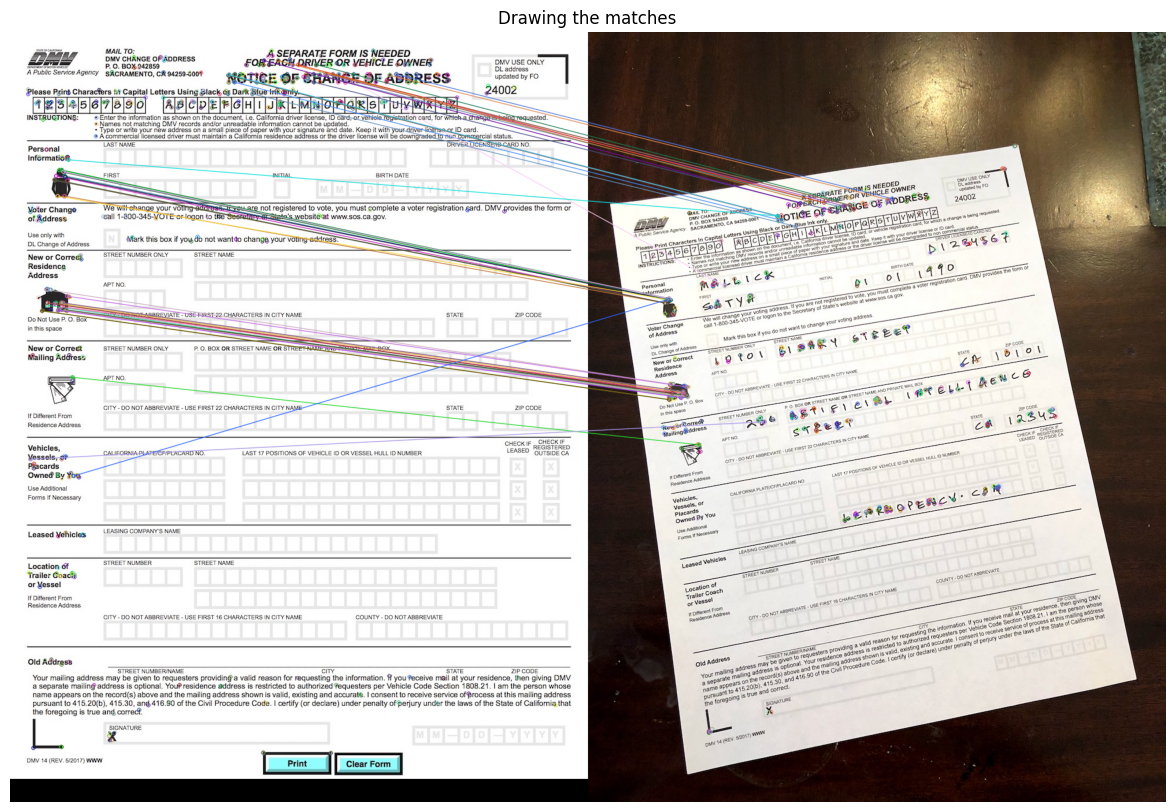

In [ ]:
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(im_matches); plt.axis('off'); plt.title('Drawing the matches')

In [ ]:
#finding the homography
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'Scanned Form')

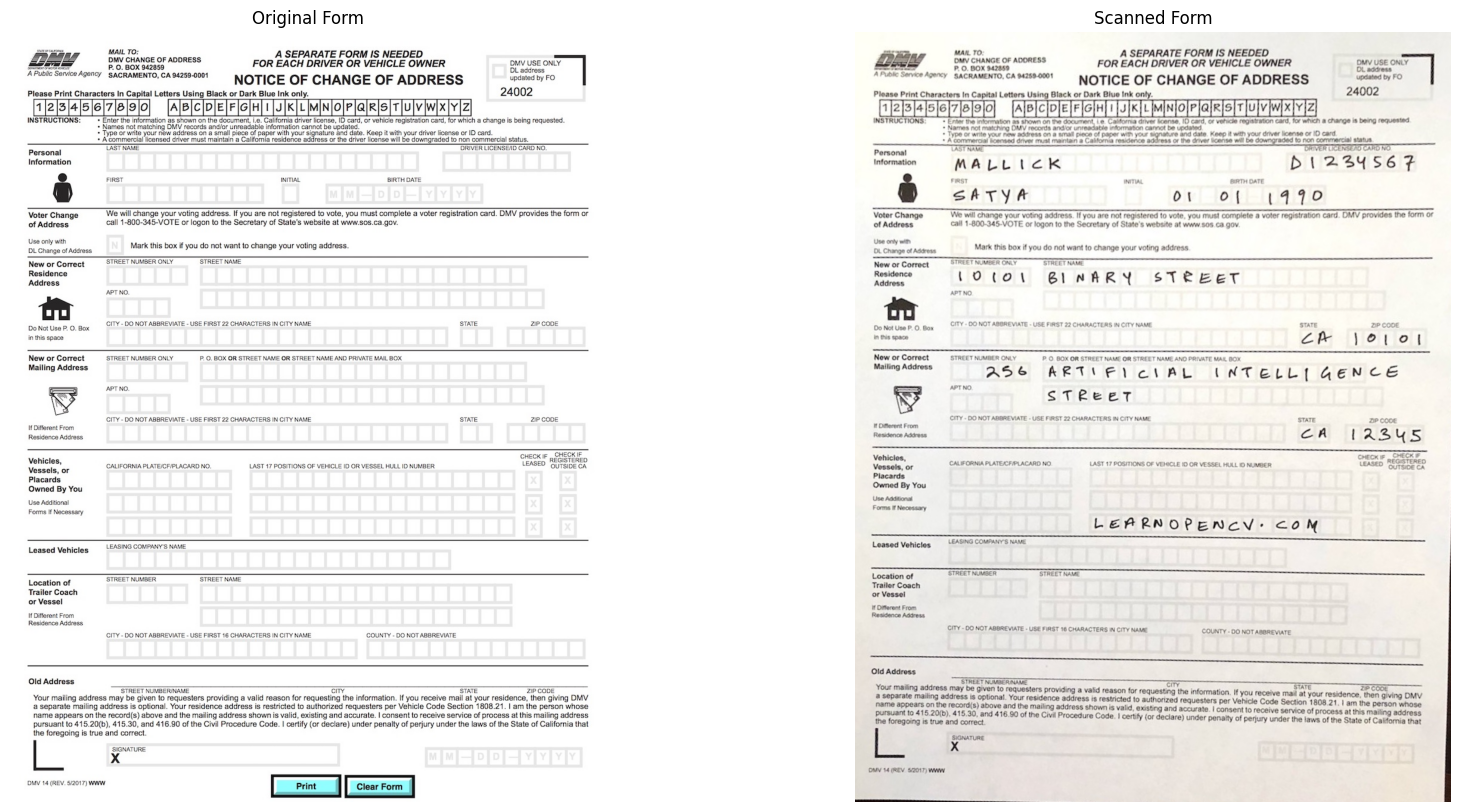

In [ ]:
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1);plt.title('Original Form')
plt.subplot(122); plt.axis('off'); plt.imshow(im2_reg);plt.title('Scanned Form')